# What is DeepLearning?
***

'알파고', '시리', '기가지니', '이루다' 등 최근 상당히 많은 AI 기반 기술과 서비스들을 우리 일상 곳곳에서 확인할 수 있는데요. 과거 정형 데이터 분석만 해왔던 것과 달리 이제는 텍스트, 이미지, 동영상 등의 비정형 데이터에 대한 분석이 요구되고 있습니다. 딥러닝에 대한 이야기와 성능은 익히 알고 계실것이라고 가정하고 바로 본론으로 넘어가도록 하겠습니다.

***

대부분의 딥러닝 구조는 여러 개의 **은닉층**을 쌓은 **인공신경망**이며 이를 **심층 신경망**이라고 부르기도 합니다. Lightgbm, XGBoost 등 정형 데이터를 다루는 우수한 알고리즘도 비정형 데이터에서는 모두 낮은 성능을 보입니다. 

딥러닝 학습 과정은 우리의 뇌가 사물을 인식하는 과정을 생각하면 조금 더 이해하기 쉬울 것입니다. 우리가 고양이와 코끼리를 구분할 때 '코의 길이', '귀 모양', '체격 차이', '털의 유무' 등 다양한 정보가 있을텐데요. 딥러닝 또한 마찬가지로 학습할 때 이러한 데이터의 특성들을 찾아 정보를 학습하게 됩니다. 더 자세한 특징을 찾아내기 위해 말 그대로 deep한 구조를 가지게 되는 것이죠. 

딥러닝은 각 층끼리 연결될 때 설정된 가중치들을 데이터의 정답과 예측값의 오차를 줄이기 위해 학습의 반대 방향으로 오차 정보를 보내 가중치를 갱신합니다. 이 과정을 **역전파**라고 합니다. 결국 딥러닝은 정답과 예측값 사이의 오차를 줄이기 위해 최적의 가중치들을 찾아가는 과정을 통해 실행된다고 할 수 있습니다.

모든 가이드는 데이터 전처리부터 모델링까지 세세한 주석들과 이론적 설명까지 첨부하여 많은 도움이 될 수 있도록하겠습니다. 거두절미하고 바로 실습과 함께 딥러닝의 기초를 알아보겠습니다.
간단한 실습은 'cifar-10' 데이터를 활용하여 진행하겠습니다. 먼저 **심층 신경망(DNN)** 구조를 이용해 데이터를 분류해보겠습니다.

In [10]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


간단히 각 데이터가 어떤 이미지인지 살펴보겠습니다.

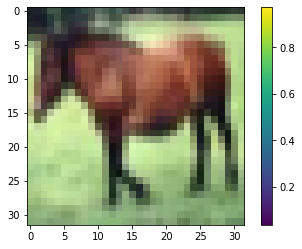

In [21]:
plt.imshow(X_train[7])
plt.colorbar()
plt.grid(False)
plt.show()

train data의 8번째 데이터는 '말'을 나타내고 있습니다.

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

먼저 데이터를 학습하고 예측할 input 데이터는 50000개, 10000개이며 가로 32 * 세로 32 * 채널 3(RGB)의 데이터 입니다. 자세한 설명은 컴퓨터 비전 가이드에서 다루도록 하겠습니다.

y값의 경우 단일 스칼라 값으로 0 ~ 10까지의 값 50000개, 10000개가 있습니다.

In [7]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

신경망은 입력 값이 -1과 1 사이일 때의 성능이 좋고 이미지의 경우 픽셀 값이 0 ~ 255사이의 숫자이므로 255로 나누어 스케일링을 해줍니다.

In [9]:
y_train = to_categorical(y_train, 10) # (50000, 10)으로 변환
y_test = to_categorical(y_test, 10) # (10000, 10)으로 변환

to_categorical은 n개의 레이블을 가지는 벡터를 레이블 수가 10개이기 때문에 1차원을 10차원으로 늘려줍니다.

In [37]:
from tensorflow.keras.models import Sequential # Sequential은 모델 네트워크를 일방향으로 쌓아 빠르게 네트워크 구조를 만들 때 사용 
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

In [45]:
model = Sequential(name = 'FirstDNN') # 모델 네트워크의 출발점으로 모델을 담을 구조를 만듭니다.
model.add(Dense(64, activation = 'relu', input_shape = (32,32,3), name = 'input_1st_Dense')) # input data의 특징(shape)와 유닛 수(64), 결과 출력 함수(relu)
model.add(Flatten(name = 'Flatten')) # 이전 층의 출력을 input으로 사용하여 하나의 벡터로 펼쳐(Flatten) 다음 층의 input을 만든다.
model.add(Dense(32, activation = 'relu', name = '2nd_Dense')) # 이전 층에서 만들어진 벡터를 input으로 사용하여 출력전 input을 만든다.
model.add(Dense(10, activation = 'softmax', name = 'output')) # 이전까지 계산된 가중치들을 사용하여 input data의 레이블(10개)을 예측한다.
model.summary() # 모델 구조 확인

Model: "FirstDNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1st_Dense (Dense)      (None, 32, 32, 64)        256       
_________________________________________________________________
Flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
2nd_Dense (Dense)            (None, 32)                2097184   
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 2,097,770
Trainable params: 2,097,770
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr = .0005), metrics = ['acc'])

loss는 정답과 예측 값 사이의 오차를 계산해줄 손실함수입니다. optimizer는 손실함수 계산을 통해 가중치를 갱신할 때 사용할 알고리즘입니다. metrics는 학습 과정에서 기록할 지표입니다.

loss, optimizer는 종류가 많기 때문에 추후에 따로 설명을 드리도록 하겠습니다.

In [47]:
history = model.fit(X_train, y_train, batch_size = 256, epochs = 5, validation_data = (X_test, y_test), workers = -1)

Epoch 1/5
196/196 [==============================] - 36s 179ms/step - loss: 2.4556 - acc: 0.1460 - val_loss: 2.0391 - val_acc: 0.2422
Epoch 2/5
196/196 [==============================] - 35s 177ms/step - loss: 1.9892 - acc: 0.2609 - val_loss: 1.8657 - val_acc: 0.3190
Epoch 3/5
196/196 [==============================] - 35s 177ms/step - loss: 1.8333 - acc: 0.3351 - val_loss: 1.7701 - val_acc: 0.3556
Epoch 4/5
196/196 [==============================] - 35s 178ms/step - loss: 1.6603 - acc: 0.4141 - val_loss: 1.5963 - val_acc: 0.4293
Epoch 5/5
196/196 [==============================] - 35s 177ms/step - loss: 1.5809 - acc: 0.4424 - val_loss: 1.5577 - val_acc: 0.4477


history는 모델의 학습과정의 결과가 따로 저장되도록 설정해주었습니다. batch_size는 훈련마다 사용할 데이터 샘플의 수입니다. epochs는 모델이 전체 데이터를 사용하여 훈련을 반복할 횟수 입니다. validation_data는 검증시 사용할 데이터입니다.

총 5번의 epochs 후 학습 데이터에서는 44.24%, 검증 데이터에서는 44.77%의 정확도를 달성한 것을 알 수 있습니다.

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

앞서 history 변수에 모델의 학습과정이 저장되었기 때문에 정확도와 손실 값을 알 수 있습니다.

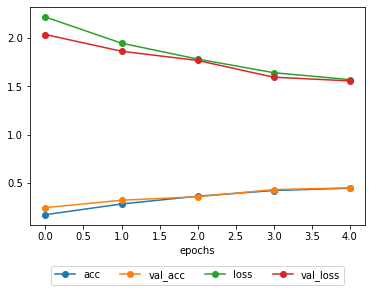

In [73]:
plt.plot(acc, marker = 'o', label = 'acc')
plt.plot(val_acc, marker = 'o', label = 'val_acc')
plt.plot(loss, marker = 'o', label = 'loss')
plt.plot(val_loss, marker = 'o', label = 'val_loss')
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(.5, -.3))
plt.xlabel('epochs')
plt.show()

epoch이 진행되면서 정확도와 loss의 변화를 한눈에 확인할 수 있습니다. 그래프를 통해서 모델의 과적합 지점을 확인할 수 있습니다.

***
지금까지 딥러닝에 대해 아주 간략하게 알아보았습니다. 이미지 데이터이지만 DNN을 사용했기 때문에 각 데이터에 대한 정보를 학습하는데 한계가 있었습니다. 다음 챕터부터는 컴퓨터 비전에 대한 전반적인 가이드를 진행하도록 하겠습니다. 감사합니다.